In [4]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [6]:
encoding_dim = 128

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='sigmoid')(input_img)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape = (encoding_dim, ))

decoded_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoded_layer(encoded_input))

#compiling the autoencoder
autoencoder.compile(optimizer = 'adam', loss = 'mse')

(x_train, _),(x_test, _) = mnist.load_data()

#reshaping the input
x_train = x_train.reshape(x_train.shape[0], 784 )
x_test = x_test.reshape(x_test.shape[0], 784 )

x_train = x_train/255 
x_test = x_test/255 

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


In [7]:
#fitting the data into the autoencoder
autoencoder.fit(x_train, x_train, epochs=10)

x_test = x_test[:5]

Epoch 1/10
60000/60000 [==============================] - 35s 579us/sample - loss: 0.0367
Epoch 2/10
60000/60000 [==============================] - 50s 827us/sample - loss: 0.0138
Epoch 3/10
60000/60000 [==============================] - 27s 457us/sample - loss: 0.0087
Epoch 4/10
60000/60000 [==============================] - 25s 410us/sample - loss: 0.0065
Epoch 5/10
60000/60000 [==============================] - 27s 442us/sample - loss: 0.0052
Epoch 6/10
60000/60000 [==============================] - 42s 694us/sample - loss: 0.0043
Epoch 7/10
60000/60000 [==============================] - 25s 420us/sample - loss: 0.0037
Epoch 8/10
60000/60000 [==============================] - 28s 466us/sample - loss: 0.0032
Epoch 9/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.0029
Epoch 10/10
60000/60000 [==============================] - 41s 691us/sample - loss: 0.0026


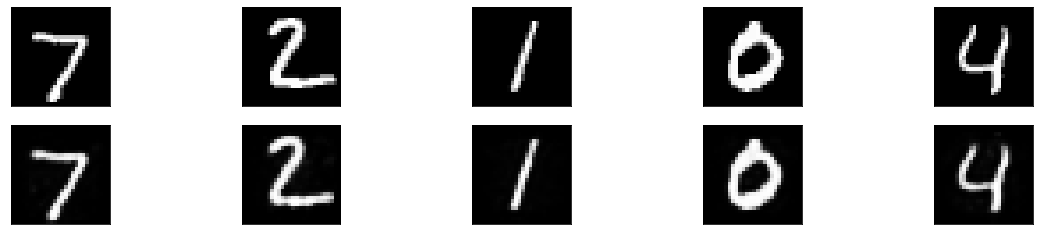

In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 5
plt.figure(figsize= (20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [11]:
encoder_input = Input(shape=(28, 28, 1), name='img')
x = layers.Conv2D(16, 3, activation='sigmoid')(encoder_input)
x = layers.Conv2D(32, 3, activation='sigmoid')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='sigmoid')(x)
x = layers.Conv2D(16, 3, activation='sigmoid')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = Model(encoder_input, encoder_output, name='encoder')

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation='sigmoid')(x)
x = layers.Conv2DTranspose(32, 3, activation='sigmoid')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='sigmoid')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='sigmoid')(x)

autoencoder = Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                